In [1]:
import pandas as pd
import sys, subprocess, json
import main
import os

In [2]:
param_grid_m1 = \
    {"complete_data": {
        'n_estimators': [100],  # Number of trees in the forest
        'criterion': ['gini'],  # Splitting criterion (impurity measure)
        'max_depth': [None],  # Maximum depth of individual trees
        'min_samples_split': [2],  # Minimum number of samples required to split a node
        'min_samples_leaf': [12],  # Minimum number of samples required to be at a leaf node
        'max_features': ["sqrt"],  # Number of features to consider when splitting
        'bootstrap': [True],  # Whether to bootstrap samples when building trees
        'oob_score': [True],  # Whether to use out-of-bag samples to estimate generalization error
    },
    "infiltrated": {
        'n_estimators': [100],  # Number of trees in the forest
        'criterion': ['gini'],  # Splitting criterion (impurity measure)
        'max_depth': [None],  # Maximum depth of individual trees
        'min_samples_split': [2],  # Minimum number of samples required to split a node
        'min_samples_leaf': [5],  # Minimum number of samples required to be at a leaf node
        'max_features': ["sqrt"],  # Number of features to consider when splitting
        'bootstrap': [True],  # Whether to bootstrap samples when building trees
        'oob_score': [True],  # Whether to use out-of-bag samples to estimate generalization error
    },
    "non-infiltrated": {
        'n_estimators': [100],  # Number of trees in the forest
        'criterion': ['gini'],  # Splitting criterion (impurity measure)
        'max_depth': [None],  # Maximum depth of individual trees
        'min_samples_split': [2],  # Minimum number of samples required to split a node
        'min_samples_leaf': [8],  # Minimum number of samples required to be at a leaf node
        'max_features': ["sqrt"],  # Number of features to consider when splitting
        'bootstrap': [True],  # Whether to bootstrap samples when building trees
        'oob_score': [True],  # Whether to use out-of-bag samples to estimate generalization error
    }
}

param_grid_m7 = \
    {"complete_data": {
        'n_estimators': [100],  # Number of trees in the forest
        'criterion': ['gini'],  # Splitting criterion (impurity measure)
        'max_depth': [None],  # Maximum depth of individual trees
        'min_samples_split': [2],  # Minimum number of samples required to split a node
        'min_samples_leaf': [15],  # Minimum number of samples required to be at a leaf node
        'max_features': ["sqrt"],  # Number of features to consider when splitting
        'bootstrap': [True],  # Whether to bootstrap samples when building trees
        'oob_score': [True],  # Whether to use out-of-bag samples to estimate generalization error
    },
    "infiltrated": {
        'n_estimators': [100],  # Number of trees in the forest
        'criterion': ['gini'],  # Splitting criterion (impurity measure)
        'max_depth': [None],  # Maximum depth of individual trees
        'min_samples_split': [2],  # Minimum number of samples required to split a node
        'min_samples_leaf': [15],  # Minimum number of samples required to be at a leaf node
        'max_features': ["sqrt"],  # Number of features to consider when splitting
        'bootstrap': [True],  # Whether to bootstrap samples when building trees
        'oob_score': [True],  # Whether to use out-of-bag samples to estimate generalization error
    },
    "non-infiltrated": {
        'n_estimators': [100],  # Number of trees in the forest
        'criterion': ['gini'],  # Splitting criterion (impurity measure)
        'max_depth': [None],  # Maximum depth of individual trees
        'min_samples_split': [2],  # Minimum number of samples required to split a node
        'min_samples_leaf': [18],  # Minimum number of samples required to be at a leaf node
        'max_features': ["sqrt"],  # Number of features to consider when splitting
        'bootstrap': [True],  # Whether to bootstrap samples when building trees
        'oob_score': [True],  # Whether to use out-of-bag samples to estimate generalization error
    }
}

default_grid = {
        'n_estimators': [100],  # Number of trees in the forest
        'criterion': ['gini'],  # Splitting criterion (impurity measure)
        'max_depth': [None],  # Maximum depth of individual trees
        'min_samples_split': [2],  # Minimum number of samples required to split a node
        'min_samples_leaf': [5],  # Minimum number of samples required to be at a leaf node
        'max_features': ["sqrt"],  # Number of features to consider when splitting
        'bootstrap': [True],  # Whether to bootstrap samples when building trees
        'oob_score': [True],  # Whether to use out-of-bag samples to estimate generalization error
    }

In [3]:
model_1_variables = ["TMB_zscore", "APOBECenrichment.total", "nonstop", "CCND1", "PD1.zscore", "PDL1.zscore",
                               "HLA-I.GSVA", "IFNg_Ayers.GSVA", "Stroma_EMT.GSVA", "T_cell_inflamed.GSVA",
                               "TGF_beta.GSVA", "Macrophages M1", "T cells CD4 memory activated", "T cells CD8",
                               "T cells regulatory (Tregs)", "ECOG_under0", "Liver.Metastasis", "APM_8.GSVA",
                               "t.spec.lncRNA.GSVA"]

model_2_variables = ["TMB_zscore"]

model_3_variables = ["TMB_zscore", "ECOG_under0", "Liver.Metastasis"]

model_7_variables = ["TMB_zscore", "CCND1", "PD1.zscore", "PDL1.zscore", "HLA-I.GSVA", "IFNg_Ayers.GSVA",
                          "Stroma_EMT.GSVA", "T_cell_inflamed.GSVA", "TGF_beta.GSVA", "Macrophages M1",
                          "T cells CD4 memory activated", "T cells CD8", "T cells regulatory (Tregs)", "APM_8.GSVA",
                          "t.spec.lncRNA.GSVA"]

model_8_variables = ["TMB_zscore", "CCND1", "PD1.zscore", "PDL1.zscore", "HLA-I.GSVA",
                                     "IFNg_Ayers.GSVA", "Stroma_EMT.GSVA", "T_cell_inflamed.GSVA", "TGF_beta.GSVA",
                                     "Macrophages M1", "T cells CD4 memory activated", "T cells CD8",
                                     "T cells regulatory (Tregs)", "ECOG_under0", "Liver.Metastasis", "APM_8.GSVA",
                                     "t.spec.lncRNA.GSVA"]

In [4]:
model_variables = {
                    "complete_model": model_1_variables}

In [5]:
parameters = {
    "target": "Response",
    "scaler": "",
    "features": "",
    "feature_selector": "",
    "num_features": 5,
    "encoder": "one_hot",
    "class_balancer": "random_undersampling",
    "evaluation_technique": 'train_test',
    "model": ["random_forest", "xgboost"],
    "enable_parameter_search": False,
    "splitting_runs": 5,
    "test_size": 0.3,
    "bootstrap_runs": 100,
    "plot_mean_roc": True,
    "roc_color": "black",
    "parameters_grid": "",
    "output_path": "/home/sergiov/PycharmProjects/ICB_Response_Model/scripts/"
}

In [6]:
# paths = {'complete_data': r"C:\Users\sergi\Downloads\df_WES+RNA_response.csv",
#          'infiltrated': r"C:\Users\sergi\Downloads\df_WES+RNA_response_inf.csv",
#          'non-infiltrated': r"C:\Users\sergi\Downloads\df_WES+RNA_response_non-inf.csv"}

# paths = {'complete_data': r"/datasets/sergio/Integrated_data/df_WES+RNA_response.csv",
#          'infiltrated': r"/datasets/sergio/Integrated_data/df_WES+RNA_response_inf.csv",
#          'non-infiltrated': r"/datasets/sergio/Integrated_data/df_WES+RNA_response_non-inf.csv"}

paths = {'complete_data': r"/datasets/sergio/Integrated_data/df_WES+RNA_response.csv"}

# paths = {
#          'no_ucg': r"/datasets/sergio/Integrated_data/removing_datasets/test_3_no_ucg.csv"}

In [8]:
colors = {"no_sny": "#d7191c",
          "no_unc": "#fdae61",
          "no_ucg": "#808080",
          "no_imvigor": "#abd9e9",
          "no_hdm": "#2c7bb6"}

/home/sergiov/PycharmProjects/ICB_Response_Model/parameters
Converted dictionary: {'target': 'Response', 'scaler': '', 'features': ['TMB_zscore', 'APOBECenrichment.total', 'nonstop', 'CCND1', 'PD1.zscore', 'PDL1.zscore', 'HLA-I.GSVA', 'IFNg_Ayers.GSVA', 'Stroma_EMT.GSVA', 'T_cell_inflamed.GSVA', 'TGF_beta.GSVA', 'Macrophages M1', 'T cells CD4 memory activated', 'T cells CD8', 'T cells regulatory (Tregs)', 'ECOG_under0', 'Liver.Metastasis', 'APM_8.GSVA', 't.spec.lncRNA.GSVA'], 'feature_selector': '', 'num_features': 5, 'encoder': 'one_hot', 'class_balancer': 'random_undersampling', 'evaluation_technique': 'train_test', 'model': ['random_forest', 'xgboost'], 'enable_parameter_search': False, 'splitting_runs': 5, 'test_size': 0.3, 'bootstrap_runs': 100, 'plot_mean_roc': True, 'roc_color': 'black', 'parameters_grid': {'n_estimators': [100], 'criterion': ['gini'], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [12], 'max_features': ['sqrt'], 'bootstrap': [True], 'oob_sco

/home/sergiov/PycharmProjects/ICB_Response_Model/venv/lib/python3.8/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/sergiov/PycharmProjects/ICB_Response_Model/venv/lib/python3.8/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Fitting 15 folds for each of 1 candidates, totalling 15 fits


/home/sergiov/PycharmProjects/ICB_Response_Model/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [16:34:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "criterion", "max_features", "min_samples_leaf", "min_samples_split", "oob_score" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sergiov/PycharmProjects/ICB_Response_Model/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [16:34:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "criterion", "max_features", "min_samples_leaf", "min_samples_split", "oob_score" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sergiov/PycharmProjects/ICB_Response_Model/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [16:34:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "criterion", "max_features", "min_samples_leaf", "min_samples_split", "oob_score" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sergiov

Finished run for complete_model complete_data :)


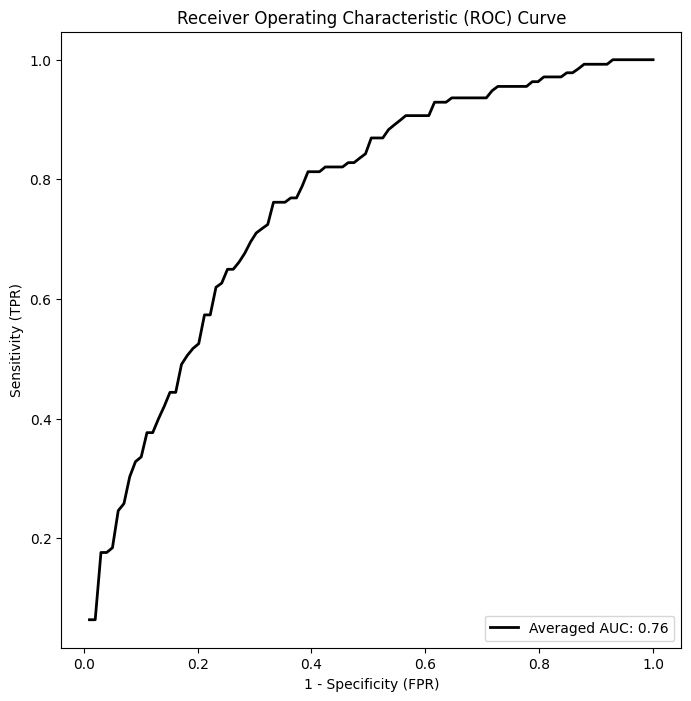

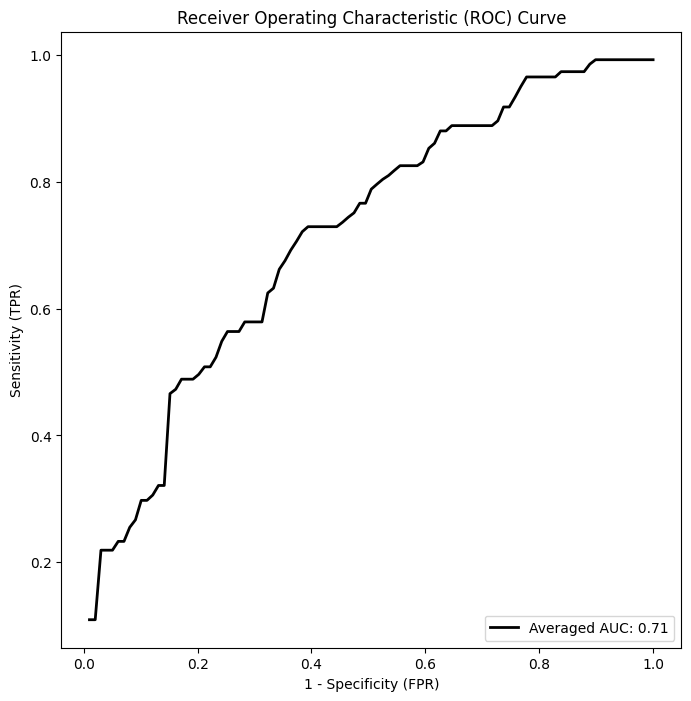

In [7]:
# path_to_main_module = r"C:\Users\sergi\PycharmProjects\ICB_Response\main.py"
# parameters_path = r"C:\Users\sergi\PycharmProjects\ICB_Response\parameters"
# output_path = r"C:\Users\sergi\PycharmProjects\ICB_Response\scripts\test.csv"
# roc_output_path = r"C:\Users\sergi\PycharmProjects\ICB_Response\scripts\roc.pdf"

path_to_main_module = r"/home/sergiov/PycharmProjects/ICB_Response_Model/main.py"
parameters_path = r"/home/sergiov/PycharmProjects/ICB_Response_Model/parameters"
output_path = r"/home/sergiov/PycharmProjects/ICB_Response_Model/scripts/test.csv"
roc_output_path = r"/home/sergiov/PycharmProjects/ICB_Response_Model/scripts/roc.pdf"

for k,v in paths.items():
    for model, variables in model_variables.items():
        if model not in ['complete_model', 'tmb_rna'] and k != 'complete_data':
            continue

        parameters['features'] = variables
        # parameters['roc_color'] = colors[k]

        # Set the parameter grid for complete data
        if k == 'complete_data':
            if model == 'complete_model':
                parameters['parameters_grid'] = param_grid_m1['complete_data']
            elif model == 'tmb_rna':
                parameters['parameters_grid'] = param_grid_m7['complete_data']
            else:
                parameters['parameters_grid'] = default_grid

        # Set the parameter grid for infiltrated data
        elif k == 'infiltrated':
            if model == 'complete_model':
                parameters['parameters_grid'] = param_grid_m1['infiltrated']
            elif model == 'tmb_rna':
                parameters['parameters_grid'] = param_grid_m7['infiltrated']

        # Set the parameter grid for non-infiltrated data
        elif k == 'non-infiltrated':
            if model == 'complete_model':
                parameters['parameters_grid'] = param_grid_m1['non-infiltrated']
            elif model == 'tmb_rna':
                parameters['parameters_grid'] = param_grid_m7['non-infiltrated']

        else:
            parameters['parameters_grid'] = default_grid

        with open(parameters_path, 'w') as json_file:
            json.dump(parameters, json_file, indent=2)

        sys.argv = [v, parameters_path]
        main.main()

        #result_df = pd.read_csv(output_path)
        #result_df.to_csv(f"{model}_{k}_results_1000runs.csv")
        #os.rename(r"/home/sergiov/PycharmProjects/ICB_Response_Model/scripts/roc.pdf", f"{model}_{k}_roc_1000runs.pdf")
        print(f"Finished run for {model} {k} :)")

In [ ]:
def transform(self, scaler, dataframe):
    scaled_dataframe = scaler.fit_transform(dataframe)

    return pd.DataFrame(scaled_dataframe, columns=dataframe.columns)

In [37]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from joblib import load

clf = load('/home/sergiov/PycharmProjects/ICB_Response_Model/scripts/model.joblib')

data = pd.read_csv('/datasets/sergio/Integrated_data/df_WES+RNA_response.csv')

data = data[model_7_variables + ['Response']].dropna()
X = data[model_7_variables]

y_true = np.where(data['Response'] == 'R', 1, 0)

y_pred = clf.predict_proba(X)[:, 1]

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

In [40]:
roc_auc

0.8188735573597409